# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.src.models import Sequential
from keras.src.layers import Dense, Input, Dropout
import seaborn as sns 
import numpy as np

In [3]:
data = pd.read_csv('./data/pollution_dataset.csv')

In [4]:
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [5]:
data.isnull().sum() / len(data) * 100

Temperature                      0.0
Humidity                         0.0
PM2.5                            0.0
PM10                             0.0
NO2                              0.0
SO2                              0.0
CO                               0.0
Proximity_to_Industrial_Areas    0.0
Population_Density               0.0
Air Quality                      0.0
dtype: float64

In [6]:
ordinal_encoder = OrdinalEncoder()

In [7]:
columns_to_encode = ["Air Quality"]
data[columns_to_encode] = ordinal_encoder.fit_transform(data[columns_to_encode])

In [8]:
X, Y = data.drop(["Air Quality"], axis=1), data['Air Quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
Y_test

1501    1.0
2586    0.0
2653    2.0
1055    1.0
705     0.0
       ... 
4711    2.0
2313    0.0
3214    3.0
2732    2.0
1926    3.0
Name: Air Quality, Length: 1000, dtype: float64

# Model 1

In [9]:
model = Sequential([
     Input(shape=(X.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax"),
])

In [10]:
model.compile( 
    loss="sparse_categorical_crossentropy", # # for multiclass with Label/Ordinal Encoder
    # loss="categorical_crossentropy", # for multiclass with One Hot Encoder
    optimizer="adam",
    metrics=["accuracy"] 
)

In [11]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=64, batch_size=32)

Epoch 1/64
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3977 - loss: 1.3690 - val_accuracy: 0.3800 - val_loss: 1.1711
Epoch 2/64
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5068 - loss: 0.9564 - val_accuracy: 0.8100 - val_loss: 0.5268
Epoch 3/64
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8431 - loss: 0.4430 - val_accuracy: 0.9175 - val_loss: 0.3167
Epoch 4/64
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9262 - loss: 0.2782 - val_accuracy: 0.9175 - val_loss: 0.2527
Epoch 5/64
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9175 - loss: 0.2447 - val_accuracy: 0.9250 - val_loss: 0.2282
Epoch 6/64
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9150 - loss: 0.2262 - val_accuracy: 0.9250 - val_loss: 0.2124
Epoch 7/64
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9210 - loss: 0.2131 - val_accuracy: 0.9300 - val_loss: 0.2023
Epoch 8/64
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.1745 - val_accuracy: 0.

<Axes: >

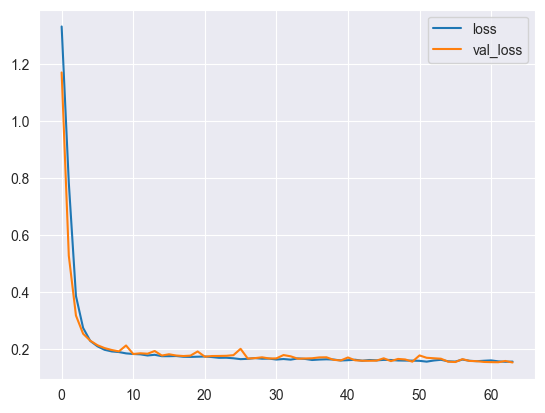

In [12]:
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [13]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

print(classification_report(Y_test, Y_pred_classes))

from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_classes)}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       409
         1.0       0.90      0.85      0.87       111
         2.0       0.96      0.94      0.95       294
         3.0       0.83      0.88      0.85       186

    accuracy                           0.94      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.94      0.94      0.94      1000

Accuracy: 0.941


# Model 2

In [49]:
model2 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(16, activation="relu"), 
    Dense(4, activation="softmax") 
])
model2.compile(
    loss="sparse_categorical_crossentropy",  # for multiclass with Label/Ordinal Encoder
    # loss="categorical_crossentropy", # for multiclass with One Hot Encoder
    optimizer="adam",
    metrics=["accuracy"]
)

In [50]:
history2 = model2.fit(X_train, Y_train, validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3400 - loss: 1.4451 - val_accuracy: 0.3775 - val_loss: 1.3546
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4315 - loss: 1.3223 - val_accuracy: 0.6125 - val_loss: 1.2578
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6117 - loss: 1.2006 - val_accuracy: 0.5725 - val_loss: 1.1019
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6288 - loss: 1.0427 - val_accuracy: 0.6925 - val_loss: 0.9389
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7291 - loss: 0.8675 - val_accuracy: 0.7675 - val_loss: 0.8099
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7916 - loss: 0.7530 - val_accuracy: 0.8075 - val_loss: 0.7174
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8139 - loss: 0.6796 - val_accuracy: 0.8175 - val_loss: 0.6501
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8435 - loss: 0.6071 - val_accuracy: 0.

In [51]:
Y_pred2 = model2.predict(X_test)
Y_pred_classes2 = np.argmax(Y_pred2, axis=1) 

print(classification_report(Y_test, Y_pred_classes2))

from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_classes2)}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       409
         1.0       0.91      0.67      0.77       111
         2.0       0.93      0.94      0.93       294
         3.0       0.75      0.85      0.80       186

    accuracy                           0.92      1000
   macro avg       0.90      0.86      0.87      1000
weighted avg       0.92      0.92      0.92      1000

Accuracy: 0.916


# Model 3

In [52]:
model3 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation="relu"), 
    Dropout(0.3),                  
    Dense(64, activation="tanh"),
    Dense(32, activation="relu"),
    Dense(4, activation="softmax")
])
model3.compile(
    loss="sparse_categorical_crossentropy",  # # for multiclass with Label/Ordinal Encoder
    # loss="categorical_crossentropy", # for multiclass with One Hot Encoder
    optimizer="adam",
    metrics=["accuracy"]
)

In [53]:
history3 = model3.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5239 - loss: 1.1122 - val_accuracy: 0.8075 - val_loss: 0.4680
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8348 - loss: 0.4193 - val_accuracy: 0.8750 - val_loss: 0.3156
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8796 - loss: 0.3228 - val_accuracy: 0.8975 - val_loss: 0.2588
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8981 - loss: 0.2736 - val_accuracy: 0.9013 - val_loss: 0.2454
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9057 - loss: 0.2493 - val_accuracy: 0.8963 - val_loss: 0.2505
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9256 - loss: 0.2158 - val_accuracy: 0.9187 - val_loss: 0.2033
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9113 - loss: 0.2248 - val_accuracy: 0.9075 - val_loss: 0.2173
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9171 - loss: 0.2036 - val_accuracy: 0.

In [54]:
Y_pred3 = model3.predict(X_test)
Y_pred_classes3 = np.argmax(Y_pred3, axis=1)  

print(classification_report(Y_test, Y_pred_classes3))

from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_classes3)}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       409
         1.0       0.92      0.76      0.83       111
         2.0       0.96      0.97      0.96       294
         3.0       0.82      0.89      0.85       186

    accuracy                           0.94      1000
   macro avg       0.92      0.90      0.91      1000
weighted avg       0.94      0.94      0.94      1000

Accuracy: 0.943
